## summarize

In [4]:
import glob,os,sys
import matplotlib.pyplot as plt
import re

In [5]:
test_t = [["T03","T0999"],"T04","T05","T06"]
data_dir = "./data"

In [7]:
def search(root,targets,reuslt,exclude=None,prefix=None):
    if not isinstance(targets,list):
        targets = [targets]
    items = os.listdir(root)
    for item in items:
        path = os.path.join(root, item)
        if os.path.isdir(path):
            # print('[-]', path)
            search(path, targets,reuslt,exclude,prefix)
        # elif item.find(target) != -1:
        #     print('[+]', path)
        elif any([re.search(target,item) for target in targets]):
            if exclude and item.endswith(exclude):
                continue
            if prefix and item.find(prefix) == -1:
                continue
#             print('[+]', path)
            reuslt.append(path)


T03 = []
search(r"D:\xy-repo\data",["T03","T0999"],T03,exclude=".png",prefix="load")



In [8]:
data = {}
for t in test_t:
    temp = []
    search(r"D:\xy-repo\data",t,temp,exclude=".png",prefix="load")
    if isinstance(t,str):
        data[t] = temp
    else:
        data[t[0]] = temp

In [9]:
for k,v in data.items():
    print(k,len(v))

T03 1017
T04 333
T05 75
T06 160


In [10]:
t03 = data["T03"]

In [11]:
t03[4]

'D:\\xy-repo\\data\\20201214\\192.168.101.10\\T03\\T03_load_104_6000_2000_0.2_steel_20201214_164641'

In [180]:
import json
import numpy as np
import os,sys
def get_basic_info(file):
    if not file:
        return
    cat = os.path.basename(file)
    with open(file) as f:
        datas = f.read()
    data = json.loads(datas)
    ret = {}
    data = np.array(data["value"])
    ret["length"] = data.shape[0]
    ret["min"] = data.min()
    ret["max"] = data.max()
    ret["var"] = round(data.var(),2)
    ret["mean"] = round(data.mean(),2)
    ret["value"] = data
    return ret
def filter(data):
    df = pd.DataFrame({"load":data})
    df["diff"] = df["load"] - df["load"].shift(fill_value=0)
    df["class"] = np.where(((df["diff"] < 5)) & (df["load"] > 100), 1, 0)
    if not len(df[df["class"] == 1])>20:
        return None
    df = df.iloc[df[df["class"] == 1].index.min():df[df["class"] == 1].index.max()]
    return df

def get_basic_infos(files):
    if not files:
        return
    index = []
    length = []
    min = []
    max = []
    var = []
    mean = []
    for file in files:
        cat = os.path.basename(file)
        i = cat.split("_")[2]
        with open(file) as f:
            datas = f.read()
        data = json.loads(datas)
        ret = {}
        data = np.array(data["value"])
        df,s,e = filter(data)
        if df["load"].mean() <100:
            continue
        l = len(mean) if len(mean) < 10 else 10
        l = l if l >0 else 1

        if mean[-l:-1] and ((round(df["load"].mean(), 2) - mean() < -50)):
            continue
        df = df.iloc[s:e]
        index.append(i)
        length.append(df["load"].shape[0])
        min.append(df["load"].min())
        max.append(df["load"].max())
        var.append(round(df["load"].var(), 2))
        mean.append(round(df["load"].mean(), 2))
    ret["index"] = index
    ret["length"] = length
    ret["min"] = min
    ret["max"] = max
    ret["var"] = var
    ret["mean"] = mean
    return ret
def trans2df(data):
    df = pd.DataFrame(data)
    df.sort_values(by=["index"],inplace=True)
    return df






In [24]:
t0304 = get_basic_info(t03[4])

In [25]:
t0304

{'length': 109,
 'min': 38.0,
 'max': 125.0,
 'var': 1607.43,
 'mean': 86.93,
 'value': array([ 39.,  38.,  38.,  39.,  39.,  38.,  39.,  39.,  39.,  39.,  39.,
         39.,  38.,  38.,  39.,  39.,  39.,  38.,  39.,  39.,  39.,  38.,
         39.,  39.,  38.,  39.,  39.,  38.,  38.,  39.,  39.,  38.,  38.,
         38.,  38.,  38.,  39.,  39.,  38.,  39.,  39.,  39.,  52.,  79.,
         96., 108., 115., 119., 118., 119., 123., 123., 123., 124., 122.,
        122., 122., 123., 124., 122., 123., 121., 122., 121., 122., 123.,
        124., 122., 123., 122., 121., 122., 122., 122., 121., 120., 121.,
        122., 122., 123., 122., 122., 122., 122., 123., 122., 124., 123.,
        123., 123., 122., 123., 124., 124., 125., 123., 122., 123., 123.,
        123., 125., 124., 124., 124., 120., 100.,  83.,  66.,  56.])}

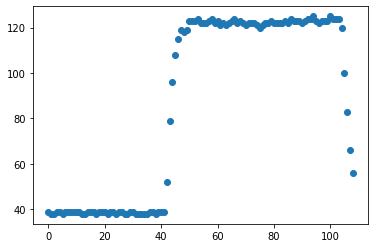

In [27]:
plt.scatter(list(range(len(t0304["value"]))),t0304["value"])

In [35]:
t0304df = pd.DataFrame({"load":t0304["value"]})

In [77]:
t0304df["class"] = np.where(t0304df["load"] >100,1,0)

In [85]:
t0304df["diff"] = t0304df["load"] - t0304df["load"].shift(fill_value=0)

In [78]:
# t0304df = t0304df.reset_index()

In [86]:
t0304df

,level_0,index,load,class,diff
0,0,0,39.0,0,39.0
1,1,1,38.0,0,-1.0
2,2,2,38.0,0,0.0
3,3,3,39.0,0,1.0
4,4,4,39.0,0,0.0
...,...,...,...,...,...
104,104,104,120.0,1,-4.0
105,105,105,100.0,0,-20.0
106,106,106,83.0,0,-17.0
107,107,107,66.0,0,-17.0


<AxesSubplot:>

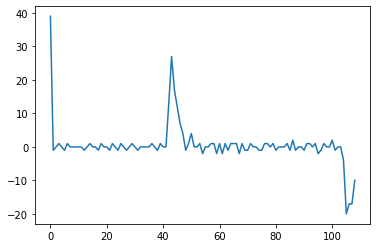

In [103]:
t0304df["diff"].plot()

<AxesSubplot:xlabel='index', ylabel='load'>

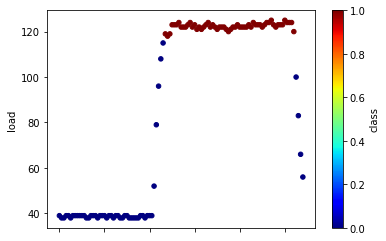

In [116]:
t0304df["class"] = np.where(((t0304df["diff"] <5)) & (t0304df["load"] >100) ,1,0)
t0304df.plot(x="index",y="load",kind="scatter",c="class",colormap="jet")

In [111]:
t0304df[t0304df["class"]==1].index.min()

47

In [112]:
t0304df[t0304df["class"]==1].index.max()

104

In [113]:
t0304df[t0304df["class"]==1]


,level_0,index,load,class,diff
47,47,47,119.0,1,4.0
48,48,48,118.0,1,-1.0
49,49,49,119.0,1,1.0
50,50,50,123.0,1,4.0
51,51,51,123.0,1,0.0
52,52,52,123.0,1,0.0
53,53,53,124.0,1,1.0
54,54,54,122.0,1,-2.0
55,55,55,122.0,1,0.0
56,56,56,122.0,1,0.0


In [114]:
t0304df.iloc[47:104]

,level_0,index,load,class,diff
47,47,47,119.0,1,4.0
48,48,48,118.0,1,-1.0
49,49,49,119.0,1,1.0
50,50,50,123.0,1,4.0
51,51,51,123.0,1,0.0
52,52,52,123.0,1,0.0
53,53,53,124.0,1,1.0
54,54,54,122.0,1,-2.0
55,55,55,122.0,1,0.0
56,56,56,122.0,1,0.0


In [17]:
import pandas as pd


In [139]:
t04 = get_basic_infos(data["T04"])


In [140]:
t04

,index,length,min,max,var,mean
0,100,47,151.0,180.0,24.37,176.87
1,101,46,139.0,181.0,44.70,176.43
2,102,45,164.0,181.0,10.93,176.98
3,103,47,165.0,183.0,16.34,178.45
4,104,45,166.0,181.0,10.39,178.20
...,...,...,...,...,...,...
296,96,45,161.0,179.0,13.70,174.93
297,97,45,164.0,180.0,9.37,176.11
298,98,46,163.0,179.0,13.82,175.78
299,99,45,155.0,181.0,20.53,176.29


In [141]:
t04.sort_values(by=["index"],inplace=True)

,index,length,min,max,var,mean
109,1,43,110.0,131.0,34.25,120.42
207,2,45,133.0,143.0,5.00,139.00
234,3,45,134.0,147.0,8.62,141.20
245,4,45,135.0,147.0,11.99,139.69
256,5,46,132.0,144.0,6.25,139.54
...,...,...,...,...,...,...
221,321,42,342.0,608.0,1694.23,585.24
222,322,43,200.0,604.0,5467.66,571.09
223,324,45,236.0,573.0,3128.46,546.36
224,325,45,194.0,669.0,6386.45,568.67


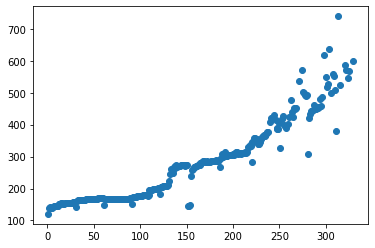

In [144]:

plt.scatter(t04["index"],t04["mean"])

<AxesSubplot:xlabel='index', ylabel='mean'>

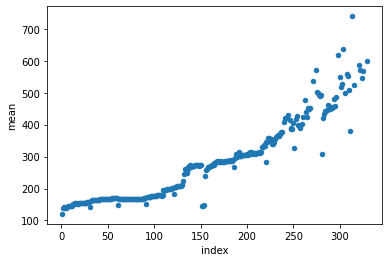

In [146]:
t04 = get_basic_infos(data["T04"])
t04.plot(x="index",y="mean",kind="scatter")

In [158]:
import math

In [161]:
math.ceil(3/2)

2

TypeError: string indices must be integers

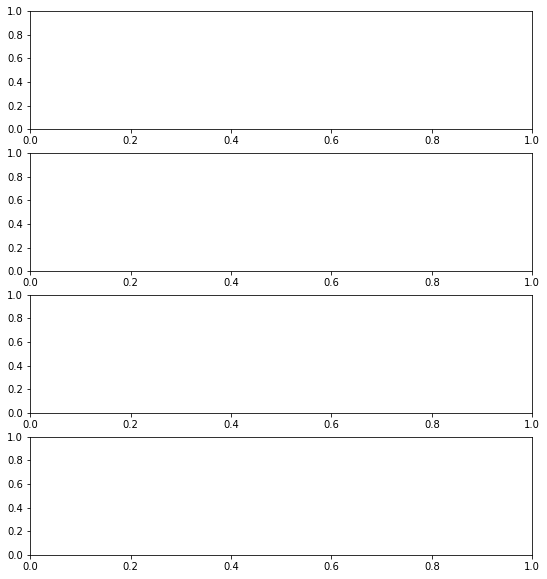

In [181]:
ll = len(data.keys())
fig,ax = plt.subplots(4,1,figsize=(9,10))
for i,(k,v) in enumerate(data.items()):
    df = get_basic_infos(data[k])
    ax[i].scatter(x=df["index"],y=df["mean"])
    ax[i].set_title(k)
plt.savefig("summary.png")

In [18]:
t04 = get_basic_infos(data["T04"])


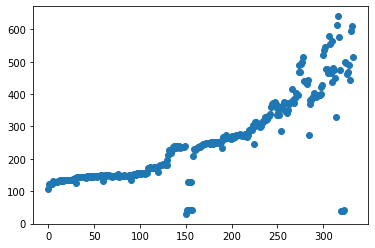

In [20]:
plt.scatter(list(range(t04df.shape[0])),t04df["mean"])

In [ ]:
plt.scatter(list(range(t04df.shape[0])),t04df["mean"])

In [ ]:
plt.scatter(list(range(t05df.shape[0])),t05df["mean"])

In [ ]:
plt.scatter(list(range(t06df.shape[0])),t06df["mean"])

In [ ]:
t04df

In [ ]:
t05df

In [ ]:
t06df

In [ ]:
t03info = get_basic_infos(t03)

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(t03info)

In [ ]:
df.sort_values(by=["index"],inplace=True)

In [ ]:
df = df[df["length"]<150]

In [ ]:
df_ = df[df["length"]<85]

In [ ]:
t06 = get_basic_infos(data["T06"])
t06df = trans2df(t06)
plt.scatter(list(range(t06df.shape[0])),t06df["length"])

In [ ]:
t05 = get_basic_infos(data["T05"])
t05df = trans2df(t05)
plt.scatter(list(range(t05df.shape[0])),t05df["length"])

In [ ]:
plt.scatter(list(range(t04df.shape[0])),t04df["length"])

In [ ]:
plt.scatter(list(range(df.shape[0])),df["length"])

In [ ]:
plt.scatter(list(range(df_.shape[0])),df_["length"])

In [ ]:
plt.scatter([100]*df_.shape[0],df_["length"])

In [ ]:
df_["length"][10:].var()

In [ ]:
plt.plot(t03info["length"])

In [ ]:
t03info["length"]

In [ ]:
np.var([12]*100 + [8]*100)

In [ ]:
for x in t03:
    info = get_basic_info(x)
    

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
with open(t03[0]) as f:
    t0 = f.read()

In [ ]:
t0 = json.loads(t0)

In [ ]:
len(t0["value"])

In [ ]:
list(range(len(t0)))

In [ ]:
plt.scatter(list(range(len(t0["value"]))),t0["value"])